In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import scipy as sp

from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer

In [7]:
train_df = pd.read_csv('../Alice/train_sessions.csv', index_col='session_id')
test_df = pd.read_csv('../Alice/test_sessions.csv', index_col='session_id')

IOError: [Errno 2] File ../Alice/train_sessions.csv does not exist: '../Alice/train_sessions.csv'

In [412]:
times = ['time%s' % i for i in range(1, 11)]
train_df[times] = train_df[times].apply(pd.to_datetime)
test_df[times] = test_df[times].apply(pd.to_datetime)

In [413]:
train_df = train_df.sort_values(by='time1')

In [380]:
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
21669,56,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
54843,56,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
77292,946,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:16,...,2013-01-12 08:50:16,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0
114021,945,2013-01-12 08:50:17,948.0,2013-01-12 08:50:17,949.0,2013-01-12 08:50:18,948.0,2013-01-12 08:50:18,945.0,2013-01-12 08:50:18,...,2013-01-12 08:50:18,947.0,2013-01-12 08:50:19,945.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:20,0
146670,947,2013-01-12 08:50:20,950.0,2013-01-12 08:50:20,948.0,2013-01-12 08:50:20,947.0,2013-01-12 08:50:21,950.0,2013-01-12 08:50:21,...,2013-01-12 08:50:21,946.0,2013-01-12 08:50:21,951.0,2013-01-12 08:50:22,946.0,2013-01-12 08:50:22,947.0,2013-01-12 08:50:22,0


In [414]:
sites = ['site%s' % i for i in range(1,11)]
times = ['time%s' % i for i in range(1,11)]

In [ ]:
train_df[sites] = train_df[sites].fillna(0).astype('int')
test_df[sites] = test_df[sites].fillna(0).astype('int')

In [384]:
train_df[times] = train_df[times].fillna('')

In [385]:
df['target'] = train_df['target']

In [388]:
train_df.time1 = train_df.time1.apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
train_df.time2 = train_df.time2.apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
train_df.time3 = train_df.time3.apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
train_df.time4 = train_df.time4.apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
train_df.time5 = train_df.time5.apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
train_df.time6 = train_df.time6.apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
train_df.time7 = train_df.time7.apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
train_df.time8 = train_df.time8.apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
train_df.time9 = train_df.time9.apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
train_df.time10 = train_df.time10.apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')

AttributeError: 'str' object has no attribute 'strftime'

In [415]:
timez=train_df[times]

In [393]:
timez = timez.apply(pd.to_datetime)

In [118]:
train_df['meantime'] = timez.mean(axis=1)

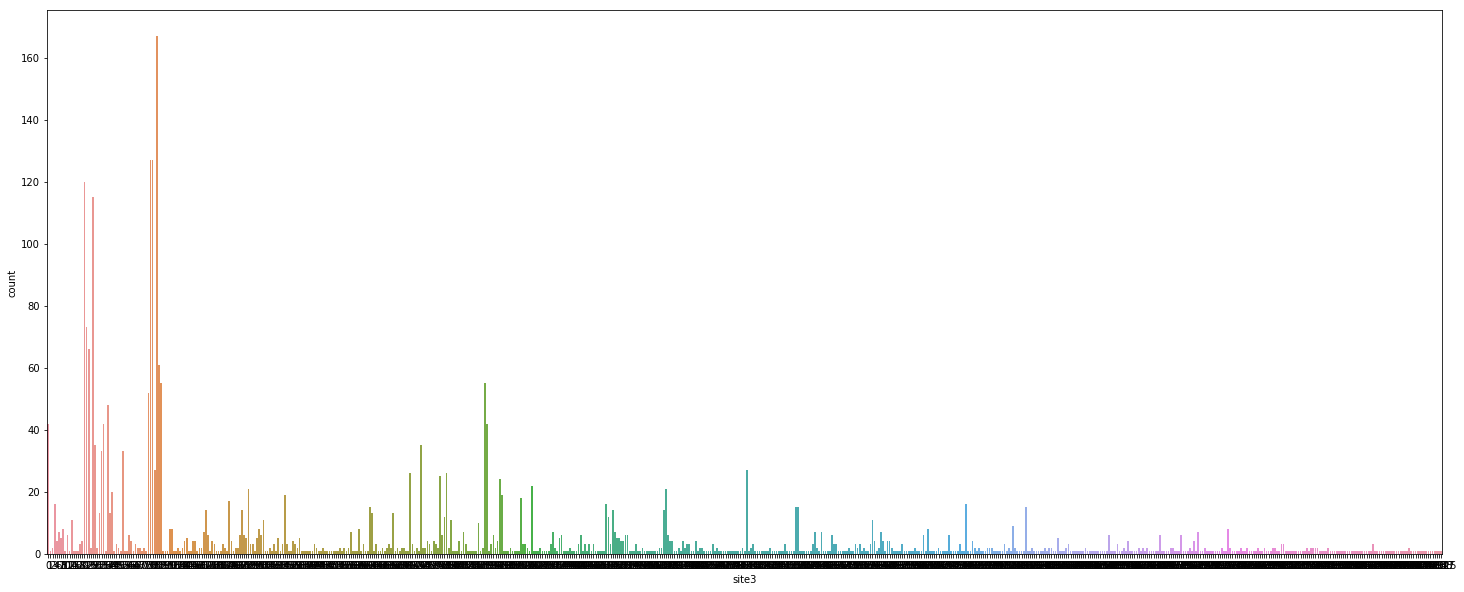

In [295]:
fig, ax = plt.subplots()
fig.set_size_inches (25,10)
sns.countplot(x='site3', data=df[df['target']==1])

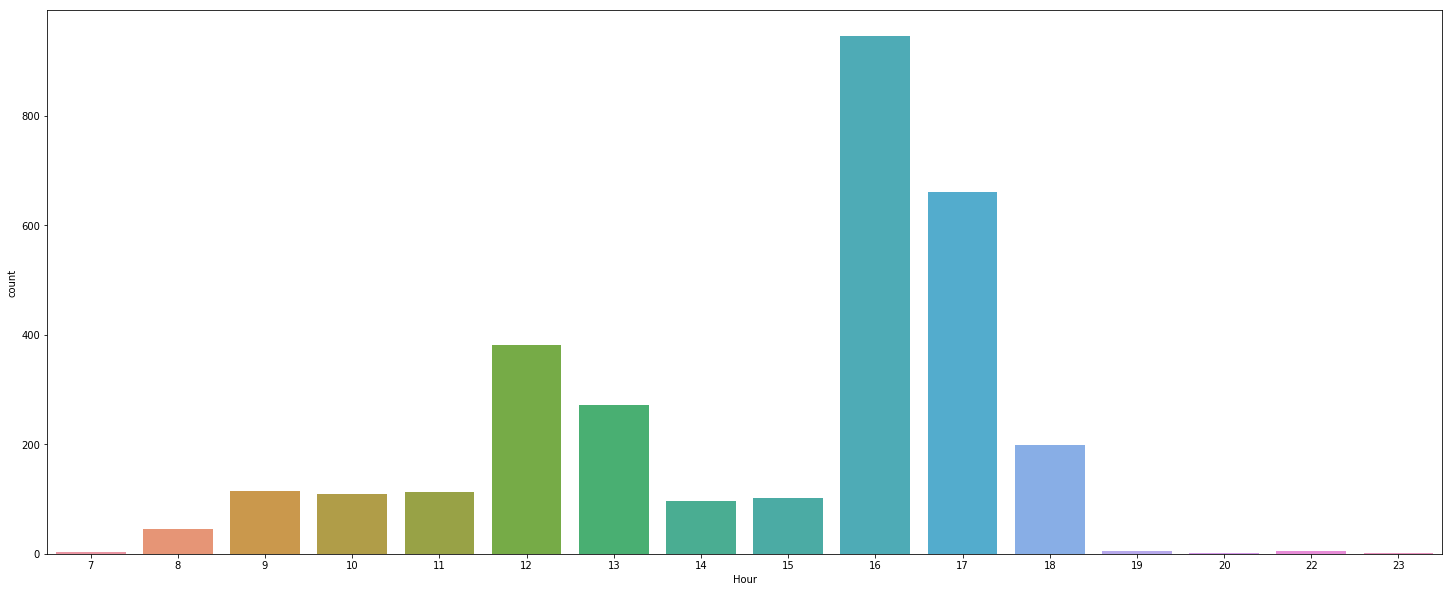

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches (25,10)
sns.countplot(x='Hour', data=df[df['target']==1])

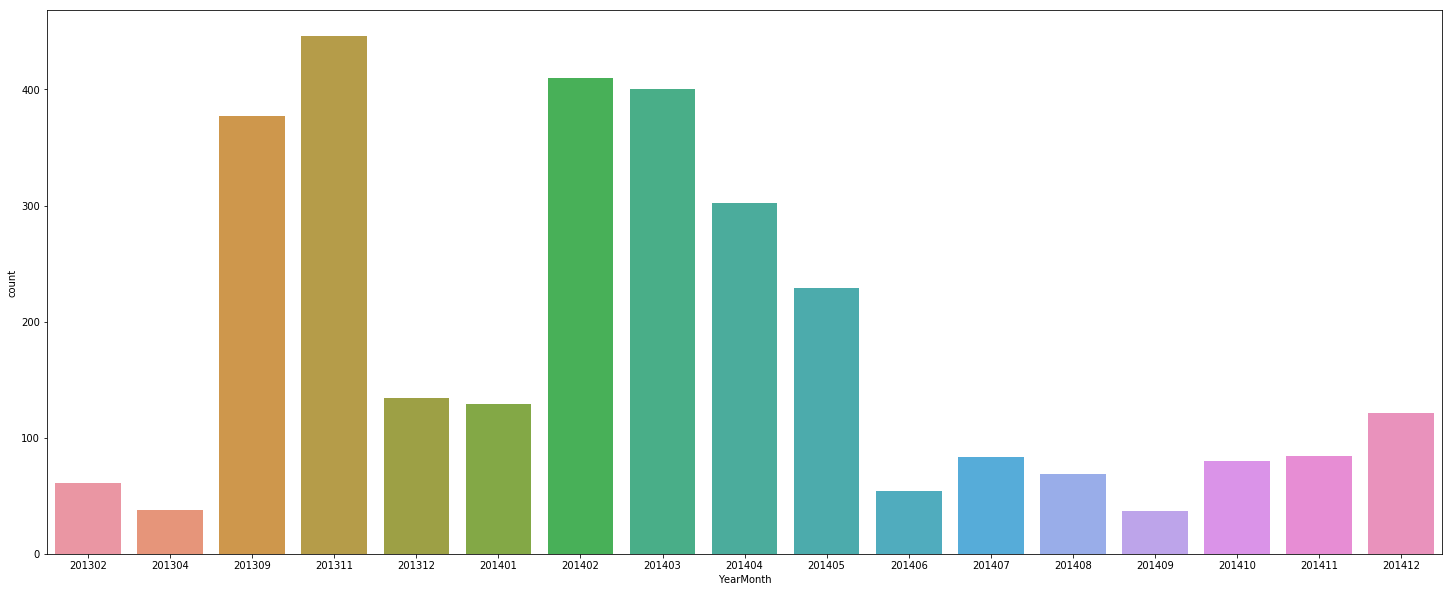

In [283]:
fig, ax = plt.subplots()
fig.set_size_inches (25,10)
sns.countplot(x='YearMonth', data=df[df['target']==1])

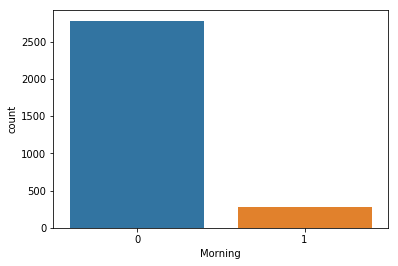

In [69]:
sns.countplot(x='Morning', data=df[df['target']==1])

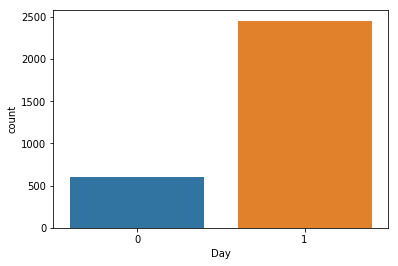

In [66]:
sns.countplot(x='Day', data=df[df['target']==1])

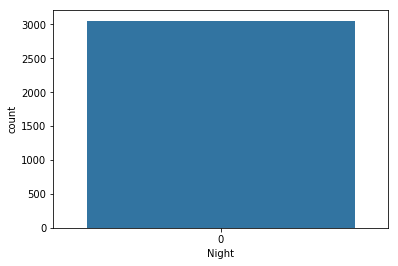

In [67]:
sns.countplot(x='Night', data=df[df['target']==1])

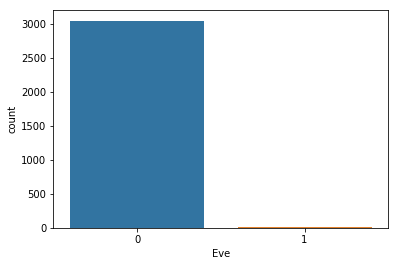

In [68]:
sns.countplot(x='Eve', data=df[df['target']==1])

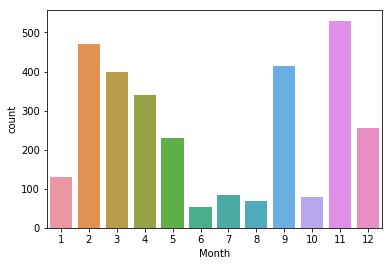

In [70]:
sns.countplot(x='Month', data=df[df['target']==1])

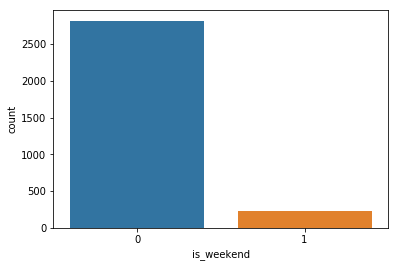

In [75]:
sns.countplot(x='is_weekend', data=df[df['target']==1])

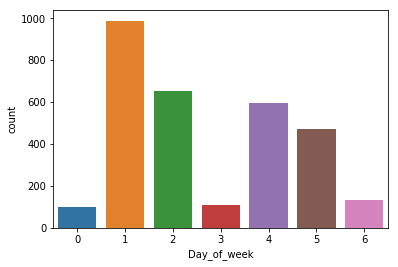

In [61]:
sns.countplot(x='Day_of_week', data=df[df['target']==1])

#### мешок-словарь

In [9]:
with open(r"../Alice/site_dic.pkl", "rb") as input_file:
    site_dict = pickle.load(input_file)


In [10]:
sites_dict = pd.DataFrame(list(site_dict.keys()), index=list(site_dict.values()), columns=['site'])
print(u'Websites total:', sites_dict.shape[0])
sites_dict.head()

Websites total: 48371


,site
25075,www.abmecatronique.com
13997,groups.live.com
42436,majeureliguefootball.wordpress.com
30911,cdt46.media.tourinsoft.eu
8104,www.hdwallpapers.eu


In [11]:
print (test_df.shape, train_df.shape)

(82797, 20) (253561, 21)


In [12]:
y_train = train_df['target']
df = pd.concat([train_df.drop('target', axis=1), test_df])
idx_split = train_df.shape[0]

#### логрег для сайтов

In [134]:
full_sites = df[sites]
print (full_sites.head())

            site1  site2  site3  site4  site5  site6  site7  site8  site9  \
session_id                                                                  
21669          56     55      0      0      0      0      0      0      0   
54843          56     55     56     55      0      0      0      0      0   
77292         946    946    951    946    946    945    948    784    949   
114021        945    948    949    948    945    946    947    945    946   
146670        947    950    948    947    950    952    946    951    946   

            site10  
session_id          
21669            0  
54843            0  
77292          946  
114021         946  
146670         947  


In [14]:
sites_flatten = full_sites.values.flatten()

In [15]:
sites_flatten

array([  56,   55,    0, ..., 1098, 1098, 1098])

In [16]:
full_sites_sparse = sp.sparse.csr_matrix(([1]*sites_flatten.shape[0], sites_flatten, range(0, sites_flatten.shape[0] + full_sites.shape[1],full_sites.shape[1])))[:, 1:]

In [120]:
full_sites_sparse

<336358x48371 sparse matrix of type '<class 'numpy.int32'>'
	with 3195430 stored elements in Compressed Sparse Row format>

In [21]:
# Select the training set from the united dataframe (where we have the answers)
X_train = full_sites_sparse[:idx_split, :]
X_test = full_sites_sparse[idx_split:, :]

#### united set split

In [485]:
def get_auc_lr_valid(X, y, C=4, seed=17, ratio= 0.8):
    # Split the data into the training and validation sets
    idx = int(round(X.shape[0] * ratio))
    # Classifier training
    lr = LogisticRegression(C=C, random_state=seed, n_jobs=-1).fit(X[:idx, :], y[:idx])
    # Prediction for validation set
    y_pred = lr.predict_proba(X[idx:, :])[:, 1]
    # Calculate the quality
    score = roc_auc_score(y[idx:], y_pred)
    
    return score

In [486]:
%%time
# Calculate metric on the validation set
print(get_auc_lr_valid(Xfull_train, y_train))

0.965696963171
Wall time: 10.9 s


In [24]:
xtr, xte, ytr, yte = train_test_split(X_train, y_train, train_size=0.8)

In [559]:
def get_auc_cv_valid(X, y, seed=17, ratio= 0.8):
    # Split the data into the training and validation sets
    idx = int(round(X.shape[0] * ratio))
    # Classifier training
    logreg = LogisticRegression()
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
    params= {'C':[0.18],
        'random_state':[17],
        'penalty': ['l2']}
    lr_grid = GridSearchCV(logreg, param_grid=params, cv=skf, scoring='roc_auc', n_jobs=-1, verbose=1)
    lr_grid.fit(X[:idx, :], y[:idx])
    # Prediction for validation set
    y_pred = lr_grid.predict_proba(X[idx:, :])[:, 1]
    # Calculate the quality
    score = roc_auc_score(y[idx:], y_pred)
    
    return lr_grid.best_params_, lr_grid.best_score_, score

In [560]:
print (get_auc_cv_valid(Xfull_train, y_train))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.5s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.5s finished


({'C': 0.18, 'penalty': 'l2', 'random_state': 17}, 0.9684171153767368, 0.95887183970904299)


In [ ]:
({'C': 4, 'penalty': 'l2', 'random_state': 17}, 0.98861524838312942, 0.96659530071337763)

In [478]:
(0.96514182658618508, {'C': 2.5, 'random_state': 17})

(0.9651418265861851, {'C': 2.5, 'random_state': 17})

In [ ]:
0.94565857219580995, LogisticRegression(C=0.78, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=17, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 0.97639093222844742)

In [298]:
def get_auc_SGD_valid(X, y, C=0.092, seed=17, ratio= 0.8):
    # Split the data into the training and validation sets
    idx = int(round(X.shape[0] * ratio))

    clf = SGDClassifier(max_iter=1000) #class_weight=snow_dict
    sgd_params = {'alpha':[0.001],
                  'loss': ['modified_huber'],
                  'random_state':[17],
                  }
    gridCV = GridSearchCV(clf, param_grid=sgd_params, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
    gridCV.fit(X[:idx, :], y[:idx])
    y_pred = gridCV.predict_proba(X[idx:, :])[:, 1]
    score = roc_auc_score(y[idx:], y_pred)
    
    return gridCV.best_params_, gridCV.best_score_, score

In [52]:
print(get_auc_SGD_valid(Xfull_train, y_train))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   44.9s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   48.7s finished


({'alpha': 0.001, 'loss': 'modified_huber', 'random_state': 17}, 0.823503191466848, 0.91456440000901651)


In [ ]:
0.8541196410286831, 0.85462297142078714)

In [564]:
v = TfidfVectorizer(stop_words=[' ','  ',','], ngram_range=(1, 6), max_features=100000, max_df=0.5)

In [239]:
t = TfidfTransformer()

In [522]:
c = CountVectorizer(ngram_range=(1, 6), max_features=100000, stop_words= None, max_df= 0.5, token_pattern='(?u)\b\w\w+\b')

In [173]:
full_sites_sparse

<336358x48371 sparse matrix of type '<class 'numpy.int32'>'
	with 3195430 stored elements in Compressed Sparse Row format>

In [252]:
strrr=["".join(str(x)) for x in df['site1'].values]

In [253]:
strrr

['56',
 '56',
 '946',
 '945',
 '947',
 '952',
 '953',
 '946',
 '946',
 '948',
 '52',
 '513',
 '4222',
 '38667',
 '56',
 '570',
 '820',
 '48',
 '5898',
 '2570',
 '22',
 '177',
 '56',
 '56',
 '56',
 '4277',
 '733',
 '753',
 '733',
 '38668',
 '1127',
 '55',
 '733',
 '733',
 '733',
 '6803',
 '570',
 '56',
 '77',
 '784',
 '80',
 '50',
 '22',
 '959',
 '948',
 '242',
 '242',
 '950',
 '56',
 '952',
 '21',
 '1106',
 '1007',
 '820',
 '55',
 '676',
 '55',
 '848',
 '52',
 '3358',
 '820',
 '303',
 '66',
 '222',
 '676',
 '23',
 '2412',
 '1547',
 '56',
 '848',
 '784',
 '784',
 '2',
 '47',
 '12',
 '7',
 '21',
 '55',
 '56',
 '570',
 '951',
 '953',
 '948',
 '951',
 '946',
 '946',
 '948',
 '56',
 '848',
 '952',
 '947',
 '953',
 '946',
 '948',
 '21',
 '55',
 '989',
 '56',
 '21',
 '21',
 '568',
 '733',
 '6090',
 '46',
 '6090',
 '820',
 '69',
 '8',
 '7',
 '6',
 '55',
 '6090',
 '3331',
 '39278',
 '733',
 '56',
 '733',
 '946',
 '946',
 '945',
 '947',
 '948',
 '946',
 '56',
 '21',
 '21',
 '23',
 '951',
 '23',


In [259]:
full_sites_str = ["".join(str(sites)) for sites in df[sites].values]

In [308]:
full_sites_str

['[56 55  0  0  0  0  0  0  0  0]',
 '[56 55 56 55  0  0  0  0  0  0]',
 '[946 946 951 946 946 945 948 784 949 946]',
 '[945 948 949 948 945 946 947 945 946 946]',
 '[947 950 948 947 950 952 946 951 946 947]',
 '[952 947 953 946 947 946 953 955 946 947]',
 '[ 953  947  946  953  955  947  953  946  953 1033]',
 '[946 947 954 953 946 954 946 956 957 956]',
 '[946 956 946 946 955 954 946 946 946 948]',
 '[948 946 948 784  49  53 812 982  52  52]',
 '[ 52  52  52 747 747 747  23 747 568  23]',
 '[ 513 1116  747   23  747  747   29   49   52   21]',
 '[4222 3358 4222 3356 4222 3870   21 3870 3358   21]',
 '[38667   181    23   181 38667    23   182   181 38667    55]',
 '[ 56  55 679 676 814  22  39 815 752  50]',
 '[ 570   23   21 3356   48  222  570  513 1379   21]',
 '[820 820 980  49  56  55  49 784 222  50]',
 '[48 56 55 55  0  0  0  0  0  0]',
 '[5898 5898 5794   21 5794 5794   21  182   23  181]',
 '[2570 2570   21   21 1102 1102   23  570  707   21]',
 '[  22   39 1102   21 1102 11

In [565]:
tfidf = v.fit_transform(full_sites_str)

In [566]:
tfidf

<336358x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 5739113 stored elements in Compressed Sparse Row format>

#### features

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
enc = OneHotEncoder(sparse=True)

In [423]:
ym = enc.fit_transform(df[['YearMonth']].as_matrix())

In [424]:
hour = enc.fit_transform(df[['Hour']].as_matrix())

In [421]:
dayweek = enc.fit_transform(df[['Day_of_week']].as_matrix())

In [425]:
month = enc.fit_transform(df[['Month']].as_matrix())

In [224]:
#sites_feat = df[sites]

In [15]:
scale = StandardScaler()

In [27]:
df['YearMonth'] = df['time1'].apply(lambda x:x.strftime('%Y%m')).astype('int64')

In [29]:
#df[['YearMonth']] = scale.fit_transform(df[['YearMonth']].as_matrix())

In [30]:
df['is_weekend'] = df['time1'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)

In [31]:
df['Hour'] = df.time1.apply(lambda x:x.strftime('%H')).astype('int64')

In [32]:
df['Morning'] = df.Hour.apply(lambda x:1 if x in range(6,11) else 0)

In [33]:
df['Week'] = df['time1'].dt.strftime('%W').astype('int64')

In [34]:
#df['Week'] = scale.fit_transform(df[['Week']].as_matrix())

In [35]:
df['Day'] = df.Hour.apply(lambda x:1 if x in range(12,18) else 0)
df['Eve'] = df.Hour.apply(lambda x:1 if x in range(19,22) else 0)
df['Night'] = df.Hour.apply(lambda x:1 if x in range(23,5) else 0)


In [36]:
df['Day_of_week'] = df['time1'].dt.strftime('%w').astype('int64')

In [37]:
#df['Day_of_week'] = scale.fit_transform(df[['Day_of_week']].as_matrix())

In [38]:
#df['Hour'] = scale.fit_transform(df[['Hour']].as_matrix())

In [39]:
df['Month'] = df.time1.dt.strftime('%m').astype('int64')

In [40]:
#df['Month'] = scale.fit_transform(df[['Month']].as_matrix())

In [41]:
df['is_summer'] = df['Month'].apply(lambda x: 1 if x in (6, 7, 8) else 0)

In [352]:
df2=pd.DataFrame

In [372]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 21669 to 204762
Data columns (total 21 columns):
site1     253561 non-null int32
time1     253561 non-null datetime64[ns]
site2     253561 non-null int32
time2     250098 non-null datetime64[ns]
site3     253561 non-null int32
time3     246919 non-null datetime64[ns]
site4     253561 non-null int32
time4     244321 non-null datetime64[ns]
site5     253561 non-null int32
time5     241829 non-null datetime64[ns]
site6     253561 non-null int32
time6     239495 non-null datetime64[ns]
site7     253561 non-null int32
time7     237297 non-null datetime64[ns]
site8     253561 non-null int32
time8     235224 non-null datetime64[ns]
site9     253561 non-null int32
time9     233084 non-null datetime64[ns]
site10    253561 non-null int32
time10    231052 non-null datetime64[ns]
target    253561 non-null int64
dtypes: datetime64[ns](10), int32(10), int64(1)
memory usage: 32.9 MB


In [417]:
timez.time1 = timez['time1'].apply(lambda x: x.strftime('%M')if not pd.isnull(x) else '')
timez.time2 = timez['time2'].apply(lambda x: x.strftime('%M')if not pd.isnull(x) else '')
timez.time3 = timez['time3'].apply(lambda x: x.strftime('%M')if not pd.isnull(x) else '')
timez.time4 = timez['time4'].apply(lambda x: x.strftime('%M')if not pd.isnull(x) else '')
timez.time5 = timez['time5'].apply(lambda x: x.strftime('%M')if not pd.isnull(x) else '')
timez.time6 = timez['time6'].apply(lambda x: x.strftime('%M')if not pd.isnull(x) else '')
timez.time7 = timez['time7'].apply(lambda x: x.strftime('%M')if not pd.isnull(x) else '')
timez.time8 = timez['time8'].apply(lambda x: x.strftime('%M')if not pd.isnull(x) else '')
timez.time9 = timez['time9'].apply(lambda x: x.strftime('%M')if not pd.isnull(x) else '')
timez.time10 = timez['time10'].apply(lambda x: x.strftime('%M')if not pd.isnull(x) else '')

In [418]:
timez['target'] = train_df['target']

In [420]:
df[times]

,time1,time2,time3,time4,time5,time6,time7,time8,time9,time10
session_id,,,,,,,,,,
21669,2013-01-12 08:05:57,2013-01-12 08:05:57,,,,,,,,
54843,2013-01-12 08:37:23,2013-01-12 08:37:23,2013-01-12 09:07:07,2013-01-12 09:07:09,,,,,,
77292,2013-01-12 08:50:13,2013-01-12 08:50:14,2013-01-12 08:50:15,2013-01-12 08:50:15,2013-01-12 08:50:16,2013-01-12 08:50:16,2013-01-12 08:50:16,2013-01-12 08:50:16,2013-01-12 08:50:17,2013-01-12 08:50:17
114021,2013-01-12 08:50:17,2013-01-12 08:50:17,2013-01-12 08:50:18,2013-01-12 08:50:18,2013-01-12 08:50:18,2013-01-12 08:50:18,2013-01-12 08:50:19,2013-01-12 08:50:19,2013-01-12 08:50:19,2013-01-12 08:50:20
146670,2013-01-12 08:50:20,2013-01-12 08:50:20,2013-01-12 08:50:20,2013-01-12 08:50:21,2013-01-12 08:50:21,2013-01-12 08:50:21,2013-01-12 08:50:21,2013-01-12 08:50:22,2013-01-12 08:50:22,2013-01-12 08:50:22
242171,2013-01-12 08:50:22,2013-01-12 08:50:23,2013-01-12 08:50:23,2013-01-12 08:50:23,2013-01-12 08:50:24,2013-01-12 08:50:24,2013-01-12 08:50:24,2013-01-12 08:50:24,2013-01-12 08:50:25,2013-01-12 08:50:25
57157,2013-01-12 08:50:25,2013-01-12 08:50:26,2013-01-12 08:50:26,2013-01-12 08:50:26,2013-01-12 08:50:26,2013-01-12 08:50:27,2013-01-12 08:50:27,2013-01-12 08:50:27,2013-01-12 08:50:28,2013-01-12 08:50:28
240201,2013-01-12 08:50:28,2013-01-12 08:50:28,2013-01-12 08:50:28,2013-01-12 08:50:29,2013-01-12 08:50:29,2013-01-12 08:50:29,2013-01-12 08:50:30,2013-01-12 08:50:30,2013-01-12 08:50:31,2013-01-12 08:50:31
210686,2013-01-12 08:50:31,2013-01-12 08:50:32,2013-01-12 08:50:32,2013-01-12 08:50:33,2013-01-12 08:50:33,2013-01-12 08:50:33,2013-01-12 08:50:34,2013-01-12 08:50:35,2013-01-12 08:50:36,2013-01-12 08:50:36


In [419]:
timez.head()

,time1,time2,time3,time4,time5,time6,time7,time8,time9,time10,target
session_id,,,,,,,,,,,
21669,2013-01-12 08:05:57,05,,,,,,,,,0
54843,2013-01-12 08:37:23,37,07,07,,,,,,,0
77292,2013-01-12 08:50:13,50,50,50,50,50,50,50,50,50,0
114021,2013-01-12 08:50:17,50,50,50,50,50,50,50,50,50,0
146670,2013-01-12 08:50:20,50,50,50,50,50,50,50,50,50,0


In [339]:
df.index

Int64Index([ 21669,  54843,  77292, 114021, 146670, 242171,  57157, 240201,
            210686,  98804,
            ...
             82788,  82789,  82790,  82791,  82792,  82793,  82794,  82795,
             82796,  82797],
           dtype='int64', name='session_id', length=336358)

In [531]:
full_feat = sp.sparse.hstack([tfidf, dayweek, hour, month, ym, df.is_weekend.reshape(-1,1), df.is_summer.reshape(-1,1), df.Night.reshape(-1, 1), df.Day.reshape(-1, 1), df.Morning.reshape(-1, 1), df.Eve.reshape(-1, 1)]).tocsr()

In [428]:
full_feat = sp.sparse.hstack([tfidf, df.is_weekend.reshape(-1, 1), df.Eve.reshape(-1, 1), df.Night.reshape(-1, 1), df.Day.reshape(-1, 1), df.is_summer.reshape(-1, 1), df.Morning.reshape(-1, 1), ym]).tocsr()

In [429]:
full_sites_sparse

<336358x48371 sparse matrix of type '<class 'numpy.int32'>'
	with 3195430 stored elements in Compressed Sparse Row format>

In [430]:
full_feat

<336358x100030 sparse matrix of type '<class 'numpy.float64'>'
	with 6430124 stored elements in Compressed Sparse Row format>

In [567]:
Xfull_train = full_feat[:idx_split, :]
Xfull_test = full_feat[idx_split:, :]

In [319]:
Xfull_train

<253561x100030 sparse matrix of type '<class 'numpy.float64'>'
	with 4799961 stored elements in Compressed Sparse Row format>

In [436]:
%%time
# Calculate metric on the validation set
print(get_auc_cv_valid(Xfull_train, y_train))
print(get_auc_lr_valid(Xfull_train, y_train))
print(get_auc_SGD_valid(Xfull_train, y_train))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.4s remaining:   17.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.6s finished


0.962224771575
0.954234737205
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


({'alpha': 0.001, 'loss': 'modified_huber', 'random_state': 17}, 0.84556989340926969, 0.95348034437946716)
Wall time: 2min 31s


In [ ]:
0.962224771575
0.954234737205
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
({'alpha': 0.001, 'loss': 'modified_huber', 'random_state': 17}, 0.84556989340926969, 0.95348034437946716)
Wall time: 2min 31s <-- OHE, no max

In [435]:
(0.94515978843679216, LogisticRegression(C=0.78, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=17, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 0.95985646513013778)
0.931922754732
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
({'alpha': 0.001, 'loss': 'modified_huber', 'random_state': 17}, 0.79811687481059268, 0.93769159960680426)
Wall time: 2min 18s   <---- with flags, no max

SyntaxError: invalid syntax (<ipython-input-435-d2f893d658c0>, line 6)

In [299]:
lr = LogisticRegression(C=0.078, random_state=17).fit(Xfull_train, y_train)

In [568]:
logreg = LogisticRegression(C=0.18)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
params= {'C':[0.18],
        'random_state':[17],
        'penalty':['l2']}

In [569]:
grid_cv = GridSearchCV(logreg, param_grid=params, cv=skf, scoring='roc_auc', n_jobs=-1, verbose=1)

In [570]:
grid_cv.fit(Xfull_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.9s remaining:   16.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=0.18, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.18], 'random_state': [17], 'penalty': ['l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [1]:
grid_cv.best_score_

NameError: name 'grid_cv' is not defined

In [ ]:
0.98863107598665467

In [2]:
y_full_pred = grid_cv.predict_proba(Xfull_test)[:,1]

NameError: name 'grid_cv' is not defined

In [302]:
def write_to_submission_file(predicted_labels, out_file, target='target', index_label='session_id'):
    predicted_df = pd.DataFrame(predicted_labels, index= np.arange(1, predicted_labels.shape[0] +1), columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [574]:
write_to_submission_file(y_full_pred,'baseline1121.csv')